# Assignment-1

This assignment loads a dataset and proceeds to plot the bias, variance for the dataset. It also uses 10 different models to view overfitting and underfitting.



In [1]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

list_files('./')

home = '.'

/
    Assignment1.pdf
    bias.JPG
    formula.png
    notebook.tex
    output_19_0.png
    output_19_1.png
    output_21_0.png
    output_21_1.png
    output_6_0.png
    Q1.ipynb
    Q1.py
    Q2.ipynb
    Q2.py
    Question_1.ipynb
    test.ipynb
    variance.JPG
.ipynb_checkpoints/
    Q1-checkpoint.ipynb
    Q2-checkpoint.ipynb
    Question_1-checkpoint.ipynb
    test-checkpoint.ipynb
.vscode/
    settings.json
Q1_data/
    data.pkl
Q2_data/
    Fx_test.pkl
    X_test.pkl
    X_train.pkl
    Y_train.pkl


The above code just ensures that the files required for the notebook exist in the file structure. We have mounted the google drive as a filesystem that is viewable at /content/drive.

**FUNCTIONS FOR HYPOTHESIS,BIAS, AND VARIANCE**


In [2]:
def hypotheis(x,intercepts,coeff):          #returns best fit function
    intercept = np.copy(intercepts)
    coef = np.copy(coeff)
    hyp = intercept + coef*x
    return hyp

def variance_calc(x,intercepts,coeff):      #returns variance of a single model
    intercept = np.copy(intercepts)
    coef = np.copy(coeff)
    intercept = np.array([intercept]).reshape(-1,1)
    coef = np.array([coef]).reshape(-1,1)

    hyp = hypotheis(x,intercept,coef)
    expec_hyp =np.sum(hyp)
    expec_hyp /= intercept.size

    expec_hyp_list = np.array([expec_hyp for i in range(len(hyp))]).reshape(-1,1)

    temp = hyp-expec_hyp_list
    temp = np.square(temp)
    variance = np.sum(temp)
    variance /= expec_hyp_list.size
    

    return variance

def bias_calc(x,intercepts,coeff,ans):    #returns bias of a single model
    intercept = np.copy(intercepts)
    coef = np.copy(coeff)
    intercept = np.array([intercept]).reshape(-1,1)
    coef = np.array([coef]).reshape(-1,1)

    hyp = hypotheis(x,intercept,coef)
    
    expec_hyp =np.sum(hyp)
    expec_hyp /= intercept.size
   
    
    bias = abs(expec_hyp-ans)
    return bias



In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import datasets, linear_model

fname = home + "/Q1_data/data.pkl"
outfile = open(fname,'rb')

dataset = np.array(pickle.load(outfile))
outfile.close()
test_data = np.array([[]])
np.random.shuffle(dataset)

size = int(len(dataset)/10.0)

test_data = dataset[0:size,:]

dataset = np.delete(dataset,[i for i in range(0,size)],axis=0)

## Running Linear Regression

This is purely to demonstrate how the linear regression is used.

In [17]:
from sklearn.linear_model import LinearRegression
#declaring variables
full_size = len(dataset)
size = int(len(dataset)/10.0)
start =0
end = size
mean_bias =0
mean_variance = 0
coef_list = np.array([])
intercept_list = np.array([])

while(end<=full_size):
    regressor = LinearRegression()  
    regressor.fit(dataset[start:end, 0].reshape(-1,1), dataset[start:end, 1] ) #training the algorithm

    #To retrieve the intercept:
    intercept = regressor.intercept_
    intercept_list = np.append(intercept_list,float(intercept))

    #For retrieving the slope:
    coef = regressor.coef_
    print(coef)
    coef_list = np.append(coef_list,float(coef))
    
    start += size
    end += size


#We now have a list for coefficients and intercepts for all 10 models

[-5.10514378]
[-4.45445174]
[-4.74082489]
[-4.70890312]
[-4.69307983]
[-4.90856944]
[-4.86664886]
[-4.6102027]
[-4.30919003]
[-4.60849698]


**Finding Mean bias and variance**

In [13]:
for i in range(int(test_data.shape[0])):
    mean_bias += bias_calc(test_data[i,0],intercept_list,coef_list,test_data[i,1])
    mean_variance += variance_calc(test_data[i,0],intercept_list,coef_list)

mean_bias /= test_data.shape[0]
mean_variance /= test_data.shape[0]
print(mean_bias)
print(mean_variance)

4.889547021675901
0.19639811884718666


## Plotting the graph

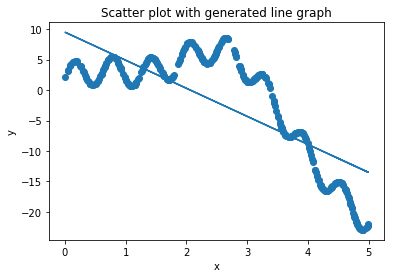

In [14]:
plt.scatter(dataset[0:size, 0], dataset[0:size, 1])

plt.title('Scatter plot with generated line graph')
best_fit_func = lambda x: coef * x + intercept
best_fit = np.vectorize(best_fit_func)

plt.plot(dataset[0:size, 0], best_fit(dataset[0:size, 0]))

plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Generalizing for higher order polynomial

This below function converts our dataset from single feature to multiple features (which are powers of the single feature)


----------------
Power is 1


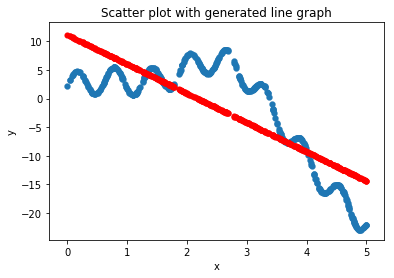

[[4.373 0.   ]
 [4.626 0.   ]]
----------------
Power is 2


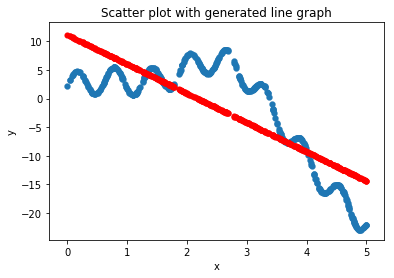

[[4.373 0.   ]
 [4.626 0.   ]]
[[4.373 0.    0.   ]
 [4.626 0.    0.   ]]
----------------
Power is 3


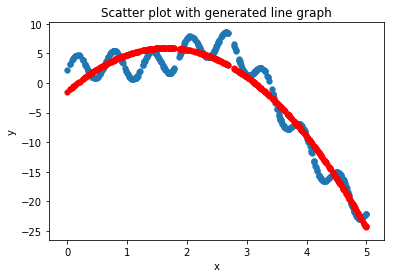

[[4.373 0.   ]
 [4.626 0.   ]]
[[4.373 0.    0.   ]
 [4.626 0.    0.   ]]
[[ 4.373    19.123129  0.        0.      ]
 [ 4.626    21.399876  0.        0.      ]]
----------------
Power is 4


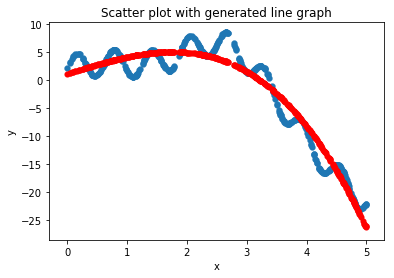

[[4.373 0.   ]
 [4.626 0.   ]]
[[4.373 0.    0.   ]
 [4.626 0.    0.   ]]
[[ 4.373    19.123129  0.        0.      ]
 [ 4.626    21.399876  0.        0.      ]]
[[ 4.373      19.123129   83.62544312  0.          0.        ]
 [ 4.626      21.399876   98.99582638  0.          0.        ]]
----------------
Power is 5


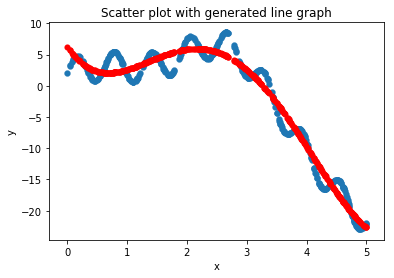

[[4.373 0.   ]
 [4.626 0.   ]]
[[4.373 0.    0.   ]
 [4.626 0.    0.   ]]
[[ 4.373    19.123129  0.        0.      ]
 [ 4.626    21.399876  0.        0.      ]]
[[ 4.373      19.123129   83.62544312  0.          0.        ]
 [ 4.626      21.399876   98.99582638  0.          0.        ]]
[[  4.373       19.123129    83.62544312 365.69406275   0.
    0.        ]
 [  4.626       21.399876    98.99582638 457.95469282   0.
    0.        ]]
----------------
Power is 6


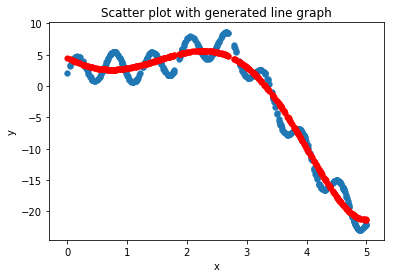

[[4.373 0.   ]
 [4.626 0.   ]]
[[4.373 0.    0.   ]
 [4.626 0.    0.   ]]
[[ 4.373    19.123129  0.        0.      ]
 [ 4.626    21.399876  0.        0.      ]]
[[ 4.373      19.123129   83.62544312  0.          0.        ]
 [ 4.626      21.399876   98.99582638  0.          0.        ]]
[[  4.373       19.123129    83.62544312 365.69406275   0.
    0.        ]
 [  4.626       21.399876    98.99582638 457.95469282   0.
    0.        ]]
[[   4.373        19.123129     83.62544312  365.69406275 1599.18013641
     0.            0.        ]
 [   4.626        21.399876     98.99582638  457.95469282 2118.49840896
     0.            0.        ]]
----------------
Power is 7


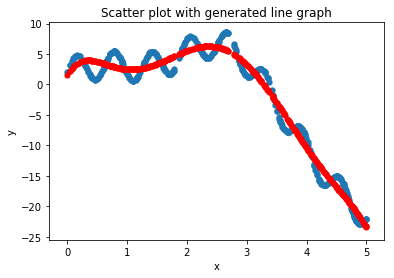

[[4.373 0.   ]
 [4.626 0.   ]]
[[4.373 0.    0.   ]
 [4.626 0.    0.   ]]
[[ 4.373    19.123129  0.        0.      ]
 [ 4.626    21.399876  0.        0.      ]]
[[ 4.373      19.123129   83.62544312  0.          0.        ]
 [ 4.626      21.399876   98.99582638  0.          0.        ]]
[[  4.373       19.123129    83.62544312 365.69406275   0.
    0.        ]
 [  4.626       21.399876    98.99582638 457.95469282   0.
    0.        ]]
[[   4.373        19.123129     83.62544312  365.69406275 1599.18013641
     0.            0.        ]
 [   4.626        21.399876     98.99582638  457.95469282 2118.49840896
     0.            0.        ]]
[[4.37300000e+00 1.91231290e+01 8.36254431e+01 3.65694063e+02
  1.59918014e+03 6.99321474e+03 0.00000000e+00 0.00000000e+00]
 [4.62600000e+00 2.13998760e+01 9.89958264e+01 4.57954693e+02
  2.11849841e+03 9.80017364e+03 0.00000000e+00 0.00000000e+00]]
----------------
Power is 8


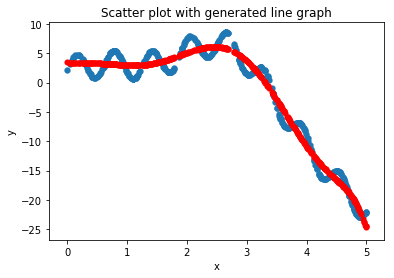

[[4.373 0.   ]
 [4.626 0.   ]]
[[4.373 0.    0.   ]
 [4.626 0.    0.   ]]
[[ 4.373    19.123129  0.        0.      ]
 [ 4.626    21.399876  0.        0.      ]]
[[ 4.373      19.123129   83.62544312  0.          0.        ]
 [ 4.626      21.399876   98.99582638  0.          0.        ]]
[[  4.373       19.123129    83.62544312 365.69406275   0.
    0.        ]
 [  4.626       21.399876    98.99582638 457.95469282   0.
    0.        ]]
[[   4.373        19.123129     83.62544312  365.69406275 1599.18013641
     0.            0.        ]
 [   4.626        21.399876     98.99582638  457.95469282 2118.49840896
     0.            0.        ]]
[[4.37300000e+00 1.91231290e+01 8.36254431e+01 3.65694063e+02
  1.59918014e+03 6.99321474e+03 0.00000000e+00 0.00000000e+00]
 [4.62600000e+00 2.13998760e+01 9.89958264e+01 4.57954693e+02
  2.11849841e+03 9.80017364e+03 0.00000000e+00 0.00000000e+00]]
[[4.37300000e+00 1.91231290e+01 8.36254431e+01 3.65694063e+02
  1.59918014e+03 6.99321474e+03 3.0581328

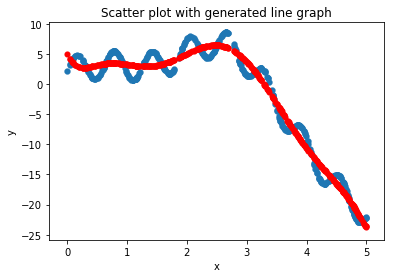

In [16]:
def compute_polynomial(x, intercept, coefficients):
  sum = intercept
  for i in range(len(coefficients)):
    sum = sum + ((x**(i+1)) * coefficients[i])
  return sum

def hypothesis_y(intercept, coefficients):

  hypo = np.copy(dataset[0:size, 0])
#   print(hypo)

  for i in range(len(hypo)):
    hypo[i] = compute_polynomial(hypo[i], intercept, coefficients)
  
  return hypo

def train_data(train_x, train_y):
  
  regressor = LinearRegression()  
  regressor.fit(train_x, train_y) #training the algorithm
  
#   #To retrieve the intercept:
  intercept = regressor.intercept_
#   print("Intercept is", intercept)

  coef = regressor.coef_
  #For retrieving the slope:
#   print("Coeffecients are", coef)

  hypo = hypothesis_y(intercept, coef)

  plt.scatter(dataset[0:size, 0], dataset[0:size, 1], linewidth=0.25)
  plt.title('Scatter plot with generated line graph')
  plt.scatter(dataset[0:size, 0], hypo, color="red", linewidth=0.1)

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

zero_col =  np.zeros((size,1), dtype=int) 

for degree in range(1, 10):
  train_x = dataset[0:size, 0].reshape(-1, 1)
  train_y = dataset[0:size, 1]

  for power in range(1, degree):
    train_x = np.append(train_x, zero_col , axis=1)
    print(train_x[0:2])
    for index in range(len(train_x)):
        try:
          train_x[index][power - 1] = train_x[index][0] ** power
        except:
          print(index, power, degree)
          pass
  print("----------------")
  print("Power is", degree)
  train_data(train_x, train_y)